<a href="https://colab.research.google.com/github/JRafaQuadros91/NLP/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução

Tendo em vista as inumeras possibilidades de análise e predição utilizando inteligência artificial e algoritmos de aprendizado de máquina, esta análise tem por objetivo analisar a base de dados *Yelp*, disponibilizada pela plataforma *Kaggle* e pela empresa *Yelp*, uma plataforma que disponibiliza e organiza avaliações de estabelecimentos comerciais. A Base de dados consiste em informações sobre os usuários, avaliações e comércio. As avaliações em forma de texto são propícias para realizar verificações com algoritmos de processamento de linguagem natural(NLP), como a *MultinomialNB*, que aplica o modelo *Naive Bayes* para classificação de contagem de *tokens* inseridas em *bag of words*.

# Objetivos

O objetivo desse modelo é a utilização de algoritmo baseado no modelo de machine learning *Naive Bayes* da plataforma *Sci-Kit Learn* para analisar e predizer o quanto a quantidade de caracteres de uma avaliação de usuário sobre um estabelecimento pode influênciar em ser considerada boa ou ruim por outros usuários.

# Materiais e métodos

Para realizar essa análise foi utilizada a Plataforma Google Colaboratory, que é uma plataforma online que tem como base o Jupyter Notebook e oferece máquinas virtuais em ambiente Linux, sendo esta disponível gratuitamente e voltada para análises que utilizam elementos de inteligência artificial, além de permitir acesso externo e possuir suporte para execução de scripts em várias linguagens de programação, principalmente Python.  Além disso, a utilização das bibliotecas *Pandas*, *Numpy* e *Sci-Kit Learn* foram necessárias para a análise de dados e aplicação dos algoritmos e predição dos resultados. Também foi necessária a utilização de bibliotecas para plot de gráficos, como a *Seaborn*.
Foi utilizada dois conjuntos de dados da Base *Yelp* , uma que traz informações sobre usuários, reviews, estabelecimentos e a avaliação sobre essas Reviews. A outra, informações sobre sugestões que os usuários dão aos estabelecimentos. As bases de dados foram tratadas, de maneira que as colunas referentes ao texto fossem transformadas em *Bags of Words* , ou seja, a partir do algoritmo *CountVectorizer* que transforma essa avaliação em vetores de tokens de texto, que são fragmentos de texto que podem ser atribuidos com contagens de valores de acordo com quantas vezes esse token aparece naquela determinada linha. Além disso, para contagem dos caracteres e possibilidade da predição foi utilizado o algoritmo *MultinomialNB*, que faz a contagem e classificação desses tokens, após separada a base de dados em treino e teste (70% treino, 70% teste). Também foi definida como alvos da predição das Reviews as avaliações das reviews com 1 ou 5 estrelas, tendo em vista que as demais apresentavam uma homogeniedade de valores. Na base Tips, foi considerada todos os valores para "likes", que são as avaliações sobre as dicas que um usuário realiza a um estabelecimento.

# Desenvolvimento

*Aqui deverá ser colocado o código referente ao trabalho, sempre descrevendo o código e cada passo realizado. Utize quantas células forem necessárias, com código ou Markdown.*

In [ ]:
import pandas as pd
import numpy as np
import csv
import json
import matplotlib.pyplot as plt
import glob
import seaborn as sns
sns.set_style('white')
%matplotlib inline
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import  MultinomialNB
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix , f1_score , precision_score
from sklearn.feature_extraction.text import CountVectorizer




from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Data Set

Reviews = pd.read_csv('/content/drive/Shareddrives/Tcc2021Rafael/data/Yelp/yelp_review.csv')

In [ ]:
Tip = pd.read_csv('/content/drive/Shareddrives/Tcc2021Rafael/data/Yelp/yelp_tip.csv')

In [ ]:
#Variáveis

In [ ]:
#Códigos - Visualização dos dados



In [ ]:
Reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5261668 entries, 0 to 5261667
Data columns (total 10 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   review_id    object
 1   user_id      object
 2   business_id  object
 3   stars        int64 
 4   date         object
 5   text         object
 6   useful       int64 
 7   funny        int64 
 8   cool         int64 
 9   text lenght  int64 
dtypes: int64(5), object(5)
memory usage: 401.4+ MB


In [ ]:
Tip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098324 entries, 0 to 1098323
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   text         1098322 non-null  object
 1   date         1098324 non-null  object
 2   likes        1098324 non-null  int64 
 3   business_id  1098324 non-null  object
 4   user_id      1098324 non-null  object
dtypes: int64(1), object(4)
memory usage: 41.9+ MB


In [ ]:
Reviews.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool,text lenght
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0,213
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0,502
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0,373
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0,523
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,0,0,0,231


In [ ]:
Tip.head()

,text,date,likes,business_id,user_id
0,Great breakfast large portions and friendly wa...,2015-08-12,0,jH19V2I9fIslnNhDzPmdkA,ZcLKXikTHYOnYt5VYRO5sg
1,Nice place. Great staff. A fixture in the tow...,2014-06-20,0,dAa0hB2yrnHzVmsCkN4YvQ,oaYhjqBbh18ZhU0bpyzSuw
2,Happy hour 5-7 Monday - Friday,2016-10-12,0,dAa0hB2yrnHzVmsCkN4YvQ,ulQ8Nyj7jCUR8M83SUMoRQ
3,"Parking is a premium, keep circling, you will ...",2017-01-28,0,ESzO3Av0b1_TzKOiqzbQYQ,ulQ8Nyj7jCUR8M83SUMoRQ
4,Homemade pasta is the best in the area,2017-02-25,0,k7WRPbDd7rztjHcGGkEjlw,ulQ8Nyj7jCUR8M83SUMoRQ


In [ ]:
Reviews.describe()

,stars,useful,funny,cool,text lenght
count,5.261668e+06,5.261668e+06,5.261668e+06,5.261668e+06,5.261668e+06
mean,3.727739e+00,1.385085e+00,5.091961e-01,5.860917e-01,6.118673e+02
std,1.433593e+00,4.528727e+00,2.686168e+00,2.233706e+00,5.721642e+02
min,1.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,1.000000e+00
25%,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.420000e+02
50%,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.340000e+02
75%,5.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,7.800000e+02
max,5.000000e+00,3.364000e+03,1.481000e+03,1.105000e+03,5.056000e+03


In [ ]:
Tip.describe()

,likes
count,1.098324e+06
mean,1.662169e-02
std,1.463697e-01
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,1.500000e+01


In [ ]:
Reviews['text lenght'] = Reviews['text'].apply(len)

In [ ]:
Tip['text lenght'] = Tip['text'].astype(str).apply(len)

In [ ]:
Reviews['text lenght'].head()

0    213
1    502
2    373
3    523
4    231
Name: text lenght, dtype: int64

In [ ]:
Tip['text lenght'].head()

0    75
1    59
2    30
3    74
4    38
Name: text lenght, dtype: int64

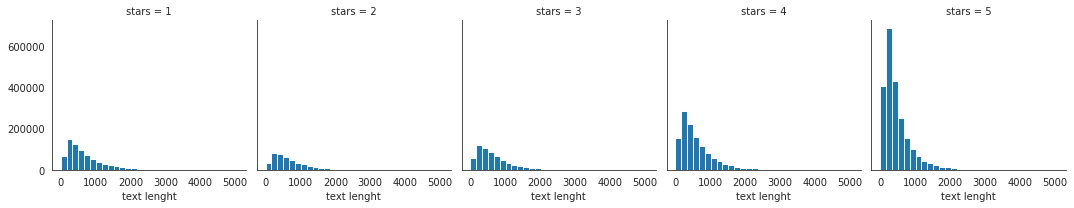

In [ ]:
g = sns.FacetGrid(Reviews,col = 'stars')
g.map(plt.hist, 'text lenght', bins = 30)

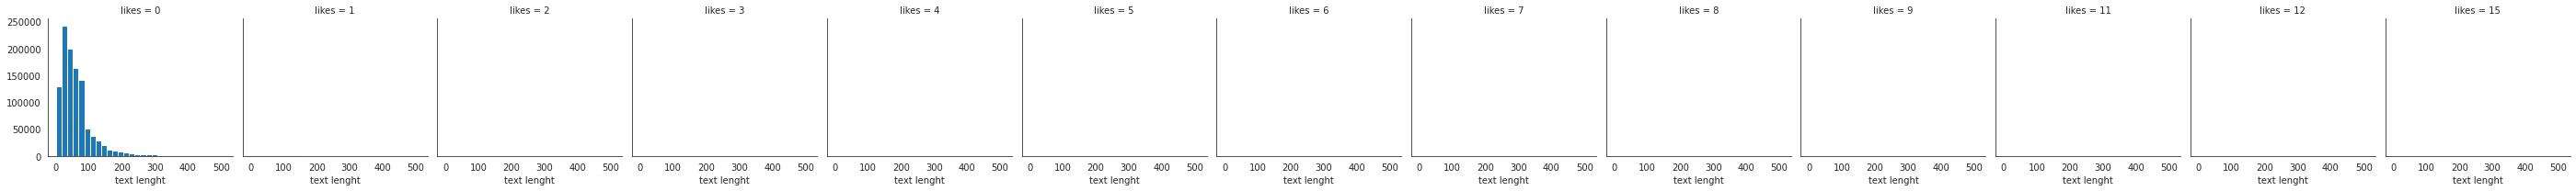

In [ ]:
g = sns.FacetGrid(Tip,col = 'likes')
g.map(plt.hist, 'text lenght', bins = 30)

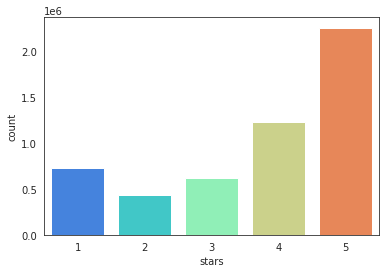

In [ ]:
sns.countplot(x='stars', data = Reviews, palette = 'rainbow')

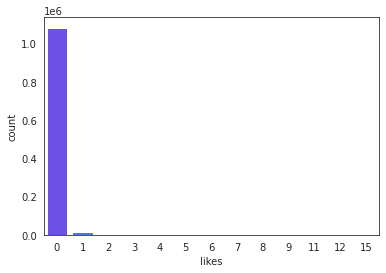

In [ ]:
sns.countplot(x='likes', data = Tip, palette = 'rainbow')

In [ ]:
stars = Reviews.groupby('stars').mean()
stars

,useful,funny,cool,text lenght
stars,,,,
1,2.210875,0.707292,0.279544,764.181383
2,1.625610,0.668248,0.415523,769.211320
3,1.341018,0.614906,0.646093,716.108068
4,1.349785,0.567573,0.824651,631.355725
5,1.101492,0.353408,0.572854,492.783366


In [ ]:
likes = Tip.groupby('likes').mean()
likes

,text lenght
likes,
0,63.240222
1,95.194998
2,123.048038
3,135.710660
4,196.686275
5,165.882353
6,161.625000
7,345.666667
8,446.000000


In [ ]:
stars.corr()

,useful,funny,cool,text lenght
useful,1.000000,0.797196,-0.767887,0.750374
funny,0.797196,1.000000,-0.442860,0.981430
cool,-0.767887,-0.442860,1.000000,-0.503737
text lenght,0.750374,0.981430,-0.503737,1.000000


In [ ]:
likes.corr()

,text lenght
text lenght,1.0


In [ ]:
#Códigos - Classificação dos dados e predição

In [ ]:
Reviews_db = Reviews[(Reviews.stars == 1) | (Reviews.stars == 5)]
Reviews_db.stars.value_counts()

5    2253347
1     731363
Name: stars, dtype: int64

In [ ]:
Tip_db = Tip
Tip_db.likes.value_counts()

0     1082040
1       14754
2        1249
3         197
4          51
5          17
6           8
7           3
15          1
12          1
11          1
9           1
8           1
Name: likes, dtype: int64

In [ ]:
X = Reviews_db['text']
Y = Reviews_db['stars']

In [ ]:
X1 = Tip_db['text']
Y1 = Tip_db['likes']

In [ ]:
cv = CountVectorizer()

In [ ]:
X = cv.fit_transform(X)

In [ ]:
X1 = cv.fit_transform(X1.values.astype('U'))


In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test,Y_train, Y_test = train_test_split(X,Y,train_size=0.7,random_state = 101)

In [ ]:
from sklearn.model_selection import train_test_split 
X1_train, X1_test,Y1_train, Y1_test = train_test_split(X1,Y1,train_size=0.7,random_state = 101)

In [ ]:
nb = MultinomialNB()

In [ ]:
nb1= MultinomialNB()

In [ ]:
nb.fit(X_train,Y_train)

MultinomialNB()

In [ ]:
nb1.fit(X1_train,Y1_train)

MultinomialNB()

In [ ]:
pred = nb.predict(X_test)

In [ ]:
pred1 = nb1.predict(X1_test)

In [ ]:

print("Matriz de confusão : Reviews ")
print(confusion_matrix(Y_test,pred))


from sklearn import metrics
print(metrics.classification_report(Y_test,pred))

Matriz de confusão : 
[[197592  21553]
 [ 38833 637436]]
              precision    recall  f1-score   support

           1       0.84      0.90      0.87    219145
           5       0.97      0.94      0.95    676269

    accuracy                           0.93    895414
   macro avg       0.90      0.92      0.91    895414
weighted avg       0.94      0.93      0.93    895414



In [ ]:

print("Matriz de confusão : Tips ")
print(confusion_matrix(Y1_test,pred1))


from sklearn import metrics
print(metrics.classification_report(Y1_test,pred1))

Matriz de confusão : Tips 
[[322281   2008    209      7      0      0      0      0      0]
 [  4477     42      1      0      0      0      0      0      0]
 [   382      8      1      0      0      0      0      0      0]
 [    60      0      0      0      0      0      0      0      0]
 [    12      2      0      0      0      0      0      0      0]
 [     4      0      0      0      0      0      0      0      0]
 [     2      0      0      0      0      0      0      0      0]
 [     1      0      0      0      0      0      0      0      0]
 [     0      1      0      0      0      0      0      0      0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.98      0.99      0.99    324505
           1       0.02      0.01      0.01      4520
           2       0.00      0.00      0.00       391
           3       0.00      0.00      0.00        60
           4       0.00      0.00      0.00        14
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1

    accuracy                           0.98    329498
   macro avg       0.11      0.11      0.11    329498
weighted avg       0.97      0.98      0.97    329498



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
CM = confusion_matrix(Y_test,pred)

In [ ]:
CM1 = confusion_matrix(Y1_test,pred1)

In [ ]:
#Resultados

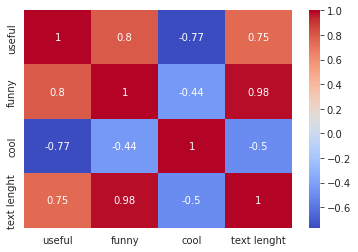

In [ ]:
sns.heatmap(stars.corr(), cmap = 'coolwarm', annot=True)

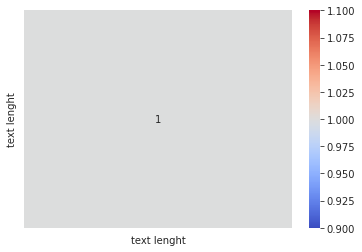

In [ ]:
sns.heatmap(likes.corr(), cmap = 'coolwarm', annot=True)

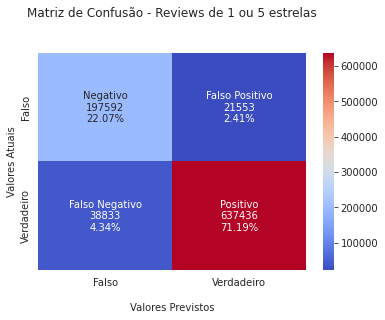

In [ ]:
group_names = ['Negativo','Falso Positivo','Falso Negativo','Positivo']

group_counts = ["{0:0.0f}".format(value) for value in
                CM.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     CM.flatten()/np.sum(CM)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(CM, annot=labels, fmt='', cmap='coolwarm')

ax.set_title('Matriz de Confusão - Reviews de 1 ou 5 estrelas\n\n');
ax.set_xlabel('\nValores Previstos')
ax.set_ylabel('Valores Atuais');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Falso','Verdadeiro'])
ax.yaxis.set_ticklabels(['Falso','Verdadeiro'])

## Display the visualization of the Confusion Matrix.
plt.show()

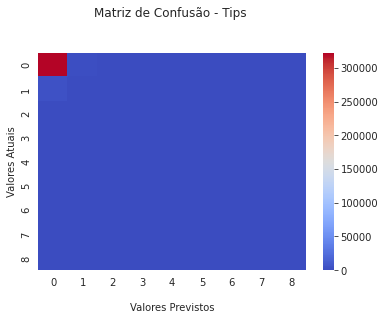

In [ ]:
group_names = ['Negativo','Falso Positivo','Falso Negativo','Positivo']

group_counts = ["{0:0.0f}".format(value) for value in
                CM1.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     CM1.flatten()/np.sum(CM1)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

#labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(CM1, fmt='', cmap='coolwarm')

ax.set_title('Matriz de Confusão - Tips \n\n');
ax.set_xlabel('\nValores Previstos')
ax.set_ylabel('Valores Atuais');

## Ticket labels - List must be in alphabetical order
#ax.xaxis.set_ticklabels(['Falso','Verdadeiro'])
#ax.yaxis.set_ticklabels(['Falso','Verdadeiro'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Resultados e discussões

O processod e análise e predição levou em conta duas partes do conjunto de dados da *Yelp* , um que diz respeito a reviews, que leva o mesmo nome do *DataFrame* atribuido no modelo e a outra leva o nome de *Tips* . Quanto a predição , a análise da base de *Reviews* teve uma acurácia de 93%,. Enquanto a Tips, apesar do *CountVectorizer* ser aplicado , bem como o *MultinominialNB* , por não conter valores expressivos de likes que não fossem classificados como 0, teve uma acurácia de 98%, contudo, seu resultado não foi heterogêneo, gerando uma matriz de confusão que tende ao valor com a massiva maioria das entradas.

# Conclusão

Após as análises e predições , verificou-se que o modelo apresenta resultados bem definidos, e possui a capacidade de fazer análise e predições de texto de maneira eficaz. A primeira base apresentou um resultado bem definido e a análise conclui que de fato, a quantidade de caracteres de uma review interfere na avaliação da mesma. Já a segunda base, devido a homogeniedade de valores, a análise não pode ser satisfatória, apesar da capacidade e do funcionamento dos algoritmos. Após isso, podemos concluir que os algoritmos utilizados para processamento de linguagem natural são uma otima maneira de fazer análise e predição envolvendo texto como bases avaliativas, além da contagem de tokens, as possibilidades de utilizar esses modelos para avaliação de texto são muito promissoras, como aplicação para conceitos de análise de sentimentos.

# Referências

*Incluir aqui as referências bibliográficas. Utilizar links para os materiais e utilizar as normas para referências da ABNT.*

[*CONE, M. Markdown Cheat Sheet: A quick reference to the Markdown syntax. Markdownguide.org, 2020.*](https://www.markdownguide.org/cheat-sheet/#downloads)  
[*FREELA, D. Markdown – Um guia para iniciantes. Produtive.me, 2019.*](https://produtive.me/guia/markdown-um-guia-para-iniciantes/)

[*Machine Learning in Python, Sci-Kit Learn – 2021.*](https://scikit-learn.org/stable/) 

[*Your Home for Data Sciente, Kaggle – 2021.*](https://www.kaggle.com/) 

[*Yelp Dataset, Kaggle – 2021.*](https://www.kaggle.com/yelp-dataset/yelp-dataset)     

[*Yelp , Yelp – 2021.*](https://www.yelp.com.br/)     




